In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))  # allows importing ../src



In [2]:
import pyscf, openfermion, qiskit
print("imports ok")


imports ok


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.systems import h2_scan
from src.runners import run_sweep_h2


In [4]:
#test 3-point H₂ scan 

R = np.array([0.7, 1.5, 3.0])
specs = h2_scan(R)

df = run_sweep_h2(specs, hea_layers=(1,2))
df


converged SCF energy = -1.11734903499028
CASSCF energy = -1.13618945406592
CASCI E = -1.13618945406592  E(CI) = -1.89215689823735  S^2 = 0.0000000
converged SCF energy = -0.910873554594387
CASSCF energy = -0.998149353471410
CASCI E = -0.998149353471410  E(CI) = -1.35093416075141  S^2 = 0.0000000
converged SCF energy = -0.656048251145591
CASSCF energy = -0.933631844558499
CASCI E = -0.933631844558499  E(CI) = -1.11002424819850  S^2 = 0.0000000


,system,name,param,mr_score,noon_0,noon_1,ansatz,layers,n_qubits,n_params,depth,n_2q,E_HF,E_FCI
0,H2,H2_R0.70,0.7,0.896629,1.173180,0.069809,HEA,1,4,4,4,3,-1.117349,-1.136189
1,H2,H2_R0.70,0.7,0.896629,1.173180,0.069809,HEA,2,4,8,7,6,-1.117349,-1.136189
2,H2,H2_R0.70,0.7,0.896629,1.173180,0.069809,UCCSD,0,4,0,0,0,-1.117349,-1.136189
3,H2,H2_R1.50,1.5,0.949553,1.390353,0.339906,HEA,1,4,4,4,3,-0.910874,-0.998149
4,H2,H2_R1.50,1.5,0.949553,1.390353,0.339906,HEA,2,4,8,7,6,-0.910874,-0.998149
5,H2,H2_R1.50,1.5,0.949553,1.390353,0.339906,UCCSD,0,4,0,0,0,-0.910874,-0.998149
6,H2,H2_R3.00,3.0,1.886711,1.055610,0.942321,HEA,1,4,4,4,3,-0.656048,-0.933632
7,H2,H2_R3.00,3.0,1.886711,1.055610,0.942321,HEA,2,4,8,7,6,-0.656048,-0.933632
8,H2,H2_R3.00,3.0,1.886711,1.055610,0.942321,UCCSD,0,4,0,0,0,-0.656048,-0.933632


In [5]:
R = np.linspace(0.7, 3.0, 12)
specs = h2_scan(R)

df = run_sweep_h2(specs, hea_layers=(1,2,3))
df.to_csv("../results/h2_scan.csv", index=False)
df.head()
print("wrote results/h2_scan.csv")


converged SCF energy = -1.11734903499028
CASSCF energy = -1.13618945406592
CASCI E = -1.13618945406592  E(CI) = -1.89215689823735  S^2 = 0.0000000
converged SCF energy = -1.08979260396117
CASSCF energy = -1.11897446374882
CASCI E = -1.11897446374882  E(CI) = -1.70106939576082  S^2 = 0.0000000
converged SCF energy = -1.03091838505665
CASSCF energy = -1.07509975146522
CASCI E = -1.07509975146522  E(CI) = -1.54834766367010  S^2 = 0.0000000
converged SCF energy = -0.964415895417479
CASSCF energy = -1.02959644553786
CASCI E = -1.02959644553786  E(CI) = -1.42829160445019  S^2 = 0.0000000
converged SCF energy = -0.900089396556247
CASSCF energy = -0.992502528732897
CASCI E = -0.992502528732897  E(CI) = -1.33693739974591  S^2 = 0.0000000
converged SCF energy = -0.842509356388973
CASSCF energy = -0.966773140792171
CASCI E = -0.966773140792171  E(CI) = -1.26994758454842  S^2 = 0.0000000
converged SCF energy = -0.793340986632727
CASSCF energy = -0.951033086951633
CASCI E = -0.951033086951633  E(CI

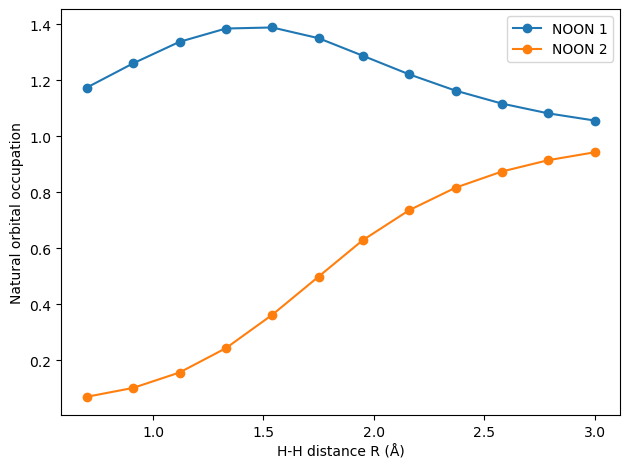

In [7]:
df_u = df[df["ansatz"]=="UCCSD"].sort_values("param")  # one row per R

plt.figure()
plt.plot(df_u["param"], df_u["noon_0"], marker="o", label="NOON 1")
plt.plot(df_u["param"], df_u["noon_1"], marker="o", label="NOON 2")
plt.xlabel("H-H distance R (Å)")
plt.ylabel("Natural orbital occupation")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h2_noons_vs_R.png", dpi=200, bbox_inches="tight")
plt.show()


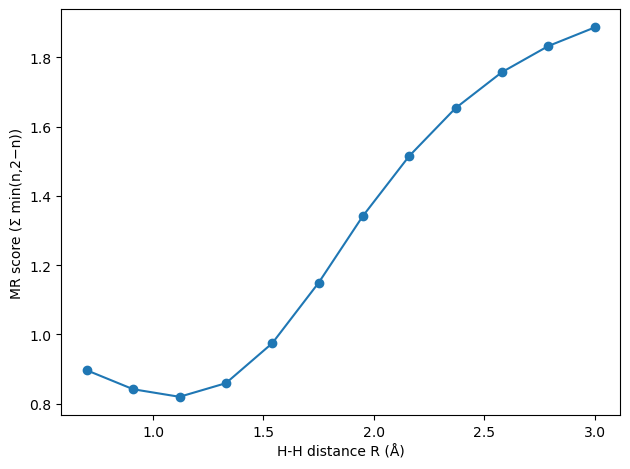

In [8]:
plt.figure()
plt.plot(df_u["param"], df_u["mr_score"], marker="o")
plt.xlabel("H-H distance R (Å)")
plt.ylabel("MR score (Σ min(n,2−n))")
plt.tight_layout()
plt.savefig("../results/figures/h2_mrscore_vs_R.png", dpi=200, bbox_inches="tight")
plt.show()


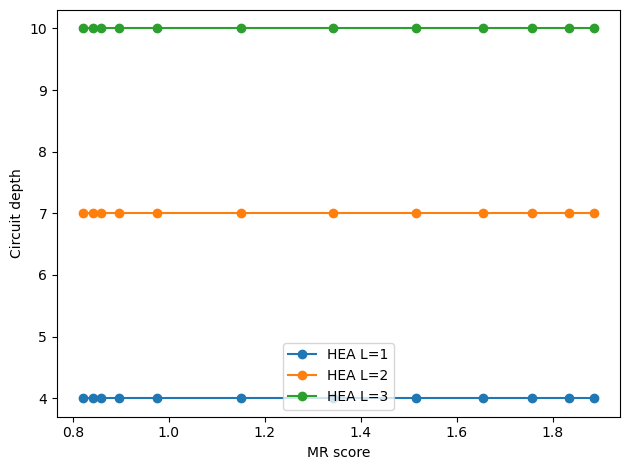

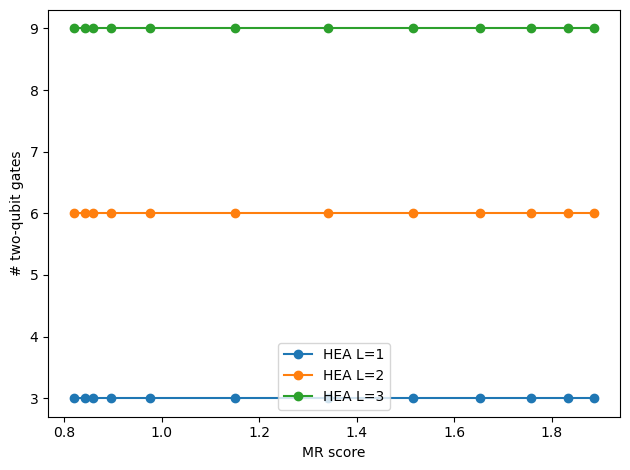

In [9]:
plt.figure()
for L in sorted(df[df["ansatz"]=="HEA"]["layers"].unique()):
    d = df[(df["ansatz"]=="HEA") & (df["layers"]==L)].sort_values("mr_score")
    plt.plot(d["mr_score"], d["depth"], marker="o", label=f"HEA L={L}")
plt.xlabel("MR score")
plt.ylabel("Circuit depth")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h2_depth_vs_mrscore.png", dpi=200, bbox_inches="tight")
plt.show()

plt.figure()
for L in sorted(df[df["ansatz"]=="HEA"]["layers"].unique()):
    d = df[(df["ansatz"]=="HEA") & (df["layers"]==L)].sort_values("mr_score")
    plt.plot(d["mr_score"], d["n_2q"], marker="o", label=f"HEA L={L}")
plt.xlabel("MR score")
plt.ylabel("# two-qubit gates")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h2_2q_vs_mrscore.png", dpi=200, bbox_inches="tight")
plt.show()
